In [ ]:
import pandas as pd
df = pd.read_csv('/content/EV_Population_WA_Data.csv')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,35.0,104823078,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,35.0,156660507,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,14.0,269374108,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,15.0,213383894,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,229496046,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


# 1) Handling Missig Data

In [ ]:
print("Current Missing Values in the Dataset:")
print(df.isnull().sum())

Current Missing Values in the Dataset:
VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 442
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                

Imputation of Missing Data -



In [ ]:
df['County'].fillna(df['County'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0], inplace=True)

<ipython-input-33-a86c0ede0e58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['County'].fillna(df['County'].mode()[0], inplace=True)
<ipython-input-33-a86c0ede0e58>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Removal of Missing Data -

In [ ]:
df.dropna(subset=['2020 Census Tract'], inplace=True)
df.dropna(subset=['Vehicle Location'], inplace=True)
df.dropna(subset=['Legislative District'], inplace=True)

In [ ]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


# 2) Handling Outliers

In [ ]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


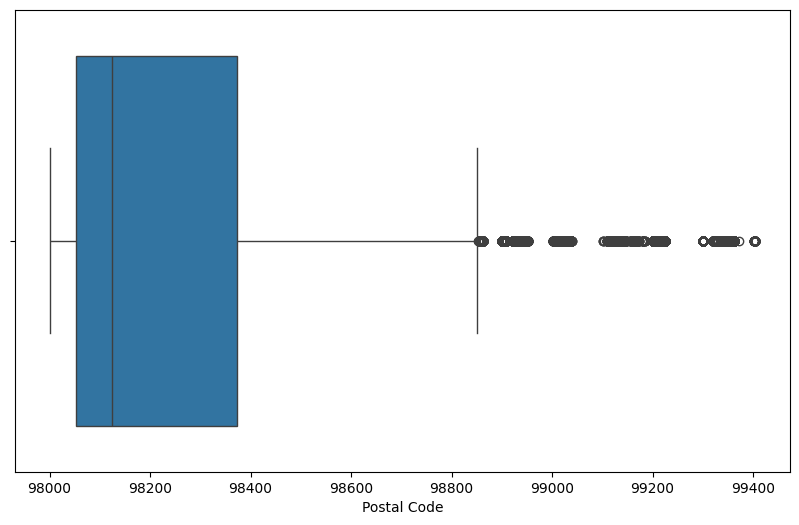

Number of outliers before handling: 7593


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Postal Code'])
plt.show()

z = np.abs(stats.zscore(df['Postal Code']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

In [ ]:
upper_limit = df['Postal Code'].quantile(0.95)
lower_limit = df['Postal Code'].quantile(0.05)
df['Postal Code'] = np.clip(df['Postal Code'], lower_limit, upper_limit)

In [ ]:
z = np.abs(stats.zscore(df['Postal Code']))
print("Number of outliers after handling:", (z > 3).sum())

Number of outliers after handling: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


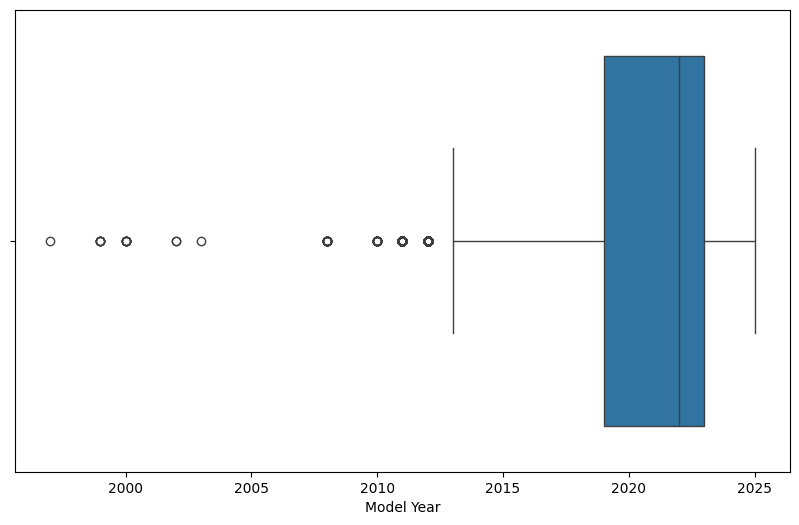

Number of outliers before handling: 781


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Model Year'])
plt.show()

z = np.abs(stats.zscore(df['Model Year']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

In [ ]:
upper_limit = df['Model Year'].quantile(0.95)
lower_limit = df['Model Year'].quantile(0.05)
df['Model Year'] = np.clip(df['Model Year'], lower_limit, upper_limit)

In [ ]:
z = np.abs(stats.zscore(df['Model Year']))
print("Number of outliers after handling:", (z > 3).sum())

Number of outliers after handling: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


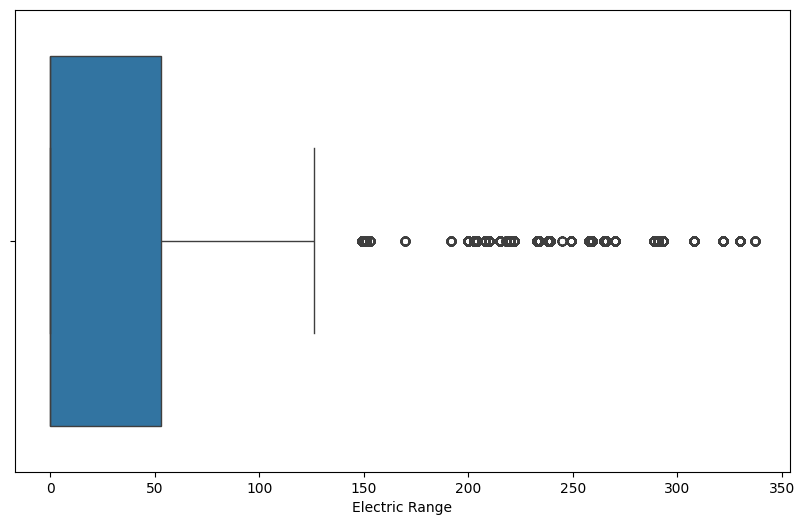

Number of outliers before handling: 2130


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Electric Range'])
plt.show()

z = np.abs(stats.zscore(df['Electric Range']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

In [ ]:
upper_limit = df['Electric Range'].quantile(0.95)
lower_limit = df['Electric Range'].quantile(0.05)
df['Electric Range'] = np.clip(df['Electric Range'], lower_limit, upper_limit)

In [ ]:
z = np.abs(stats.zscore(df['Electric Range']))
print("Number of outliers after handling:", (z > 3).sum())

Number of outliers after handling: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


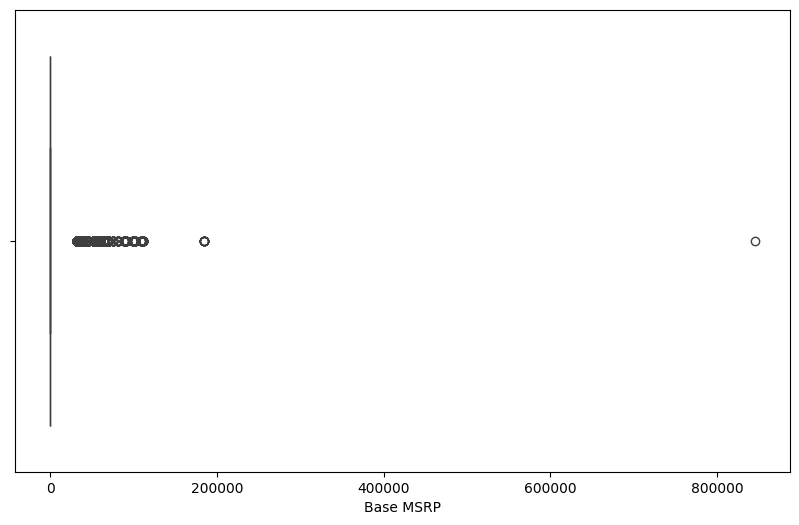

Number of outliers before handling: 3310


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Base MSRP'])
plt.show()

z = np.abs(stats.zscore(df['Base MSRP']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

In [ ]:
upper_limit = df['Base MSRP'].quantile(0.95)
lower_limit = df['Base MSRP'].quantile(0.05)
df['Base MSRP'] = np.clip(df['Base MSRP'], lower_limit, upper_limit)

In [ ]:
z = np.abs(stats.zscore(df['Base MSRP']))
print("Number of outliers after handling:", (z > 3).sum())

Number of outliers after handling: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


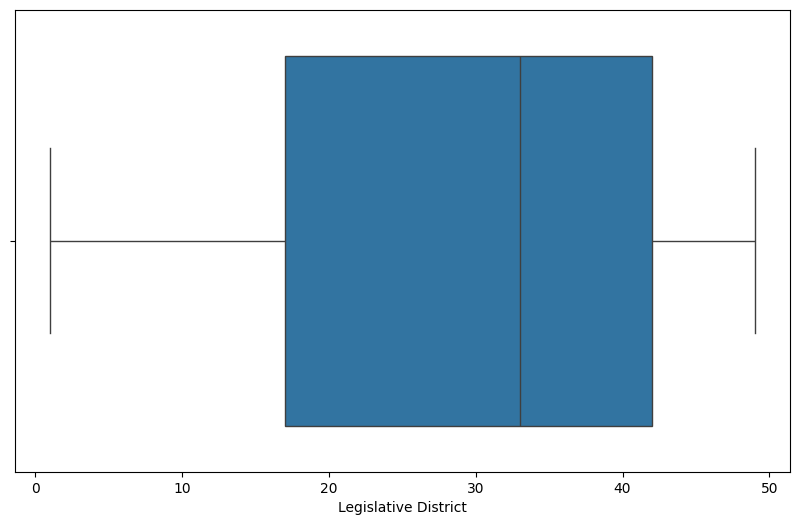

Number of outliers before handling: 0


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Legislative District'])
plt.show()

z = np.abs(stats.zscore(df['Legislative District']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


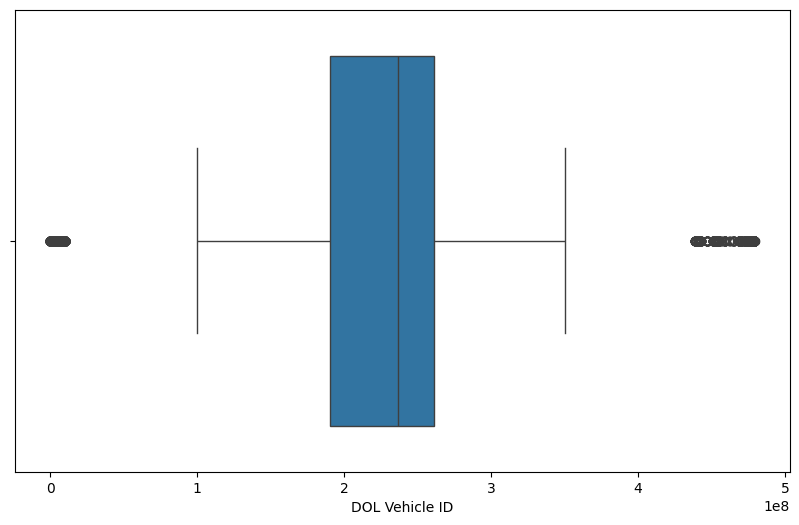

Number of outliers before handling: 9111


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['DOL Vehicle ID'])
plt.show()

z = np.abs(stats.zscore(df['DOL Vehicle ID']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

In [ ]:
upper_limit = df['DOL Vehicle ID'].quantile(0.95)
lower_limit = df['DOL Vehicle ID'].quantile(0.05)
df['DOL Vehicle ID'] = np.clip(df['DOL Vehicle ID'], lower_limit, upper_limit)

In [ ]:
z = np.abs(stats.zscore(df['DOL Vehicle ID']))
print("Number of outliers after handling:", (z > 3).sum())

Number of outliers after handling: 0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


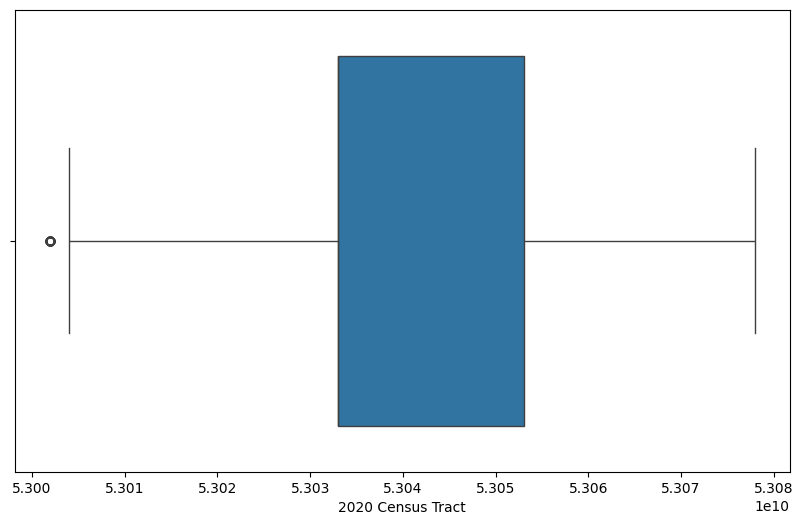

Number of outliers before handling: 0


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['2020 Census Tract'])
plt.show()

z = np.abs(stats.zscore(df['2020 Census Tract']))
df_outliers = df[z > 3]
print("Number of outliers before handling:", (z > 3).sum())

# 3) Correct Data Types

In [ ]:
print("Data types before correction:")
print(df.dtypes)

Data types before correction:
VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                       float64
Vehicle Location                                      object
Electric Utility                                      o

In [ ]:
df['Postal Code'] = df['Postal Code'].astype('category')
df['Legislative District'] = df['Legislative District'].astype('category')
df['2020 Census Tract'] = df['2020 Census Tract'].astype('category')
df['County'] = df['County'].astype('category')
df['City'] = df['City'].astype('category')
df['State'] = df['State'].astype('category')
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].astype('category')

In [ ]:
print("Data types after correction:")
print(df.dtypes)

Data types after correction:
VIN (1-10)                                             object
County                                               category
City                                                 category
State                                                category
Postal Code                                          category
Model Year                                              int64
Make                                                 category
Model                                                category
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility      object
Electric Range                                          int64
Base MSRP                                               int64
Legislative District                                 category
DOL Vehicle ID                                        float64
Vehicle Location                                       object
Electric Utility                         

# 4) Handling Duplicates

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows before removal:", duplicate_rows.shape[0])

Number of duplicate rows before removal: 411


In [ ]:
df.drop_duplicates(inplace=True)
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows after removal:", duplicate_rows.shape[0])

Number of duplicate rows after removal: 0


In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)